In [2]:
! pip install -r requirements.txt

  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached joblib-1.5.0-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached jinja2-3.

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## 📌 About the Notebook

- Dataset = (https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing). 

- The aim of this notebook is to perfrom understand the Data and pre-process it for modeling it and optimizing it later.


## 📌 Variable Descriptions

Below are brief explanations of all the columns in the bank direct marketing dataset:

* **age**: Customer’s age (numeric)
* **job**: Customer’s occupation (e.g., "admin.", "technician", "services")
* **marital**: Marital status (e.g., "married", "single", "divorced")
* **education**: Education level (e.g., "primary", "secondary", "tertiary", "unknown")
* **default**: Has credit card debt default? ("yes", "no", "unknown")
* **balance**: Customer’s current bank balance (in EUR)
* **housing**: Has a housing loan? ("yes", "no", "unknown")
* **loan**: Has a personal loan? ("yes", "no", "unknown")
* **contact**: Communication channel used to contact the customer ("cellular", "telephone")
* **day**: Day of the month the last contact occurred
* **month**: Month of the last contact (e.g., "may", "aug")
* **duration**: Duration of the last call (in seconds)
* **campaign**: Number of times the customer was contacted during this campaign
* **pdays**: Number of days since the customer was last contacted in a previous campaign

  * If never contacted, marked as 999
* **previous**: Number of times the customer was contacted in previous campaigns
* **poutcome**: Outcome of the previous campaign ("success", "failure", "other", "unknown")
* **deposit**: Did the customer open a term deposit account as a result of this campaign? ("yes", "no") → **dependent variable**


In [4]:
data = pd.read_csv('bank.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
data.shape

(11162, 17)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [6]:
data.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [7]:
categorical_cols = data.select_dtypes(include='object').columns.tolist()
print("Categorical Cols:", categorical_cols)

Categorical Cols: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']


## Distributions of each Features

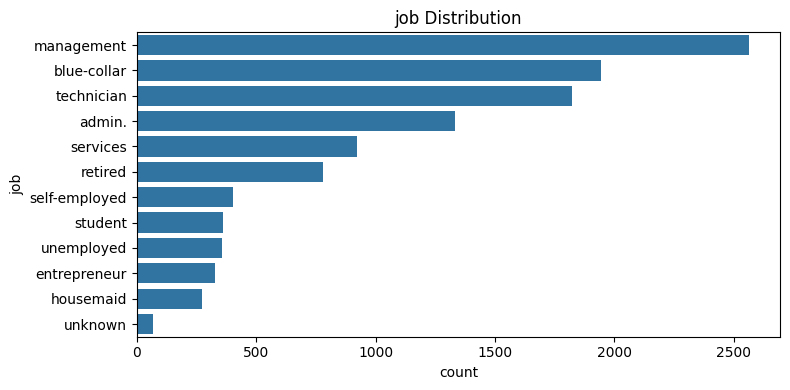

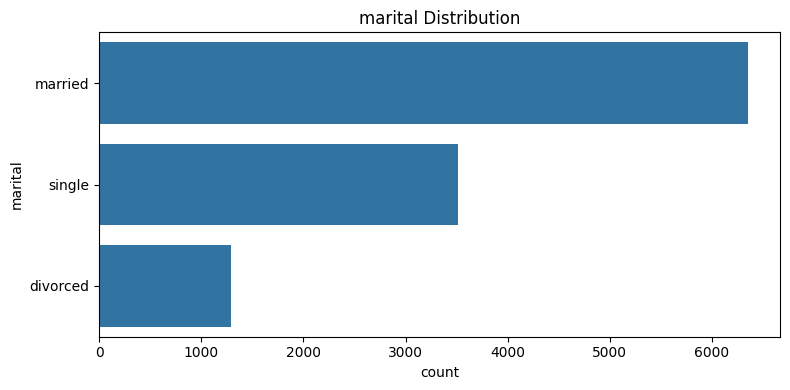

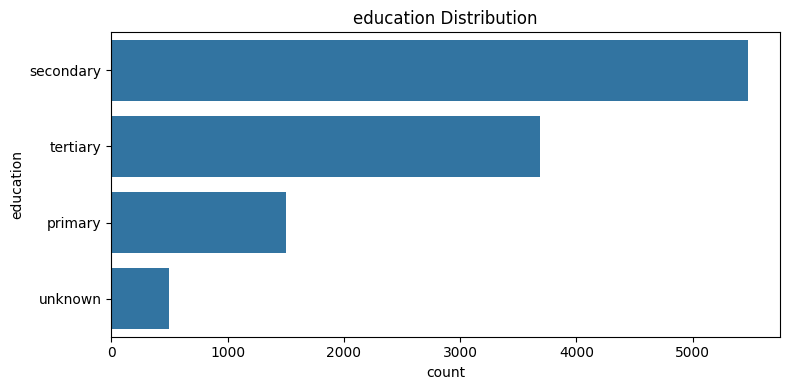

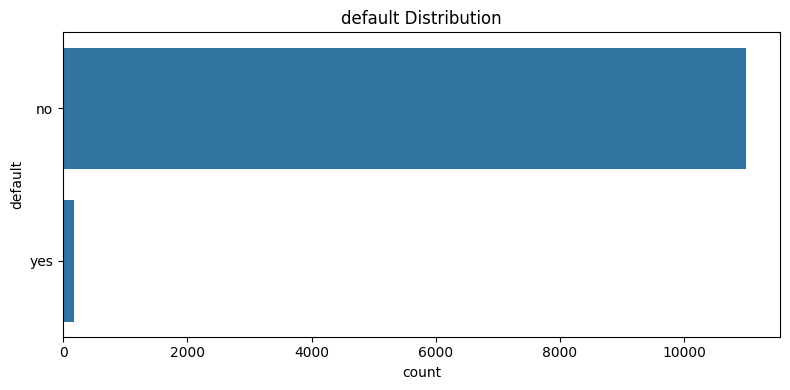

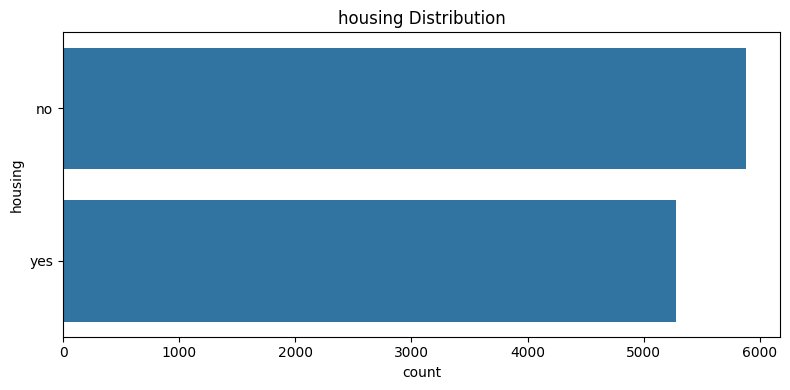

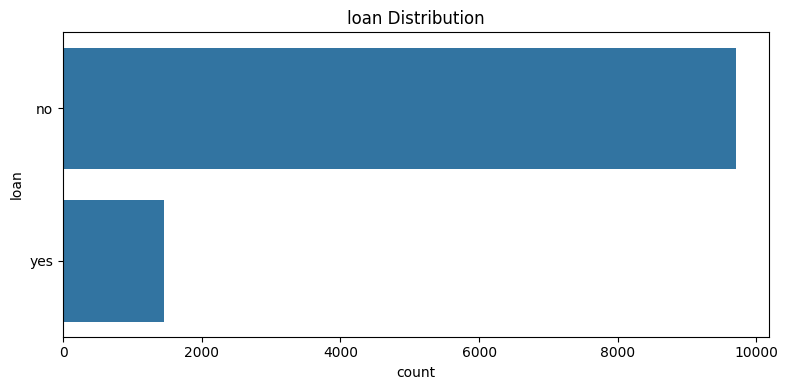

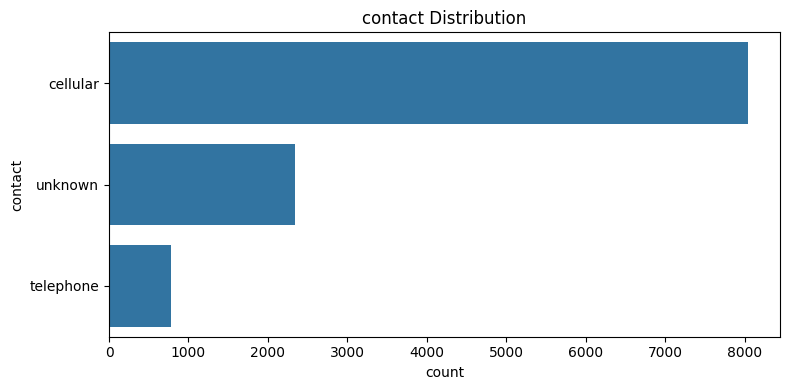

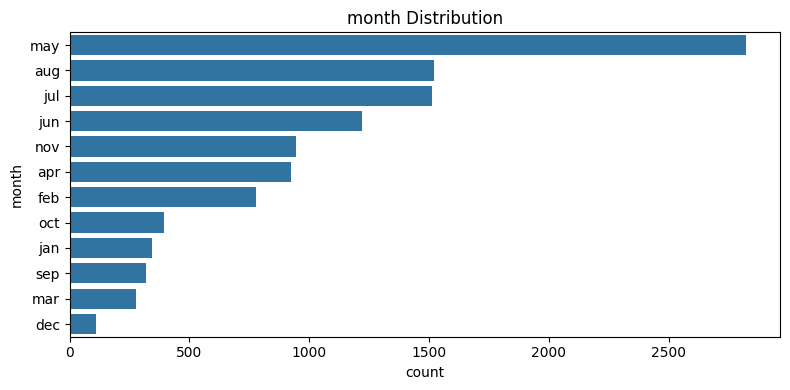

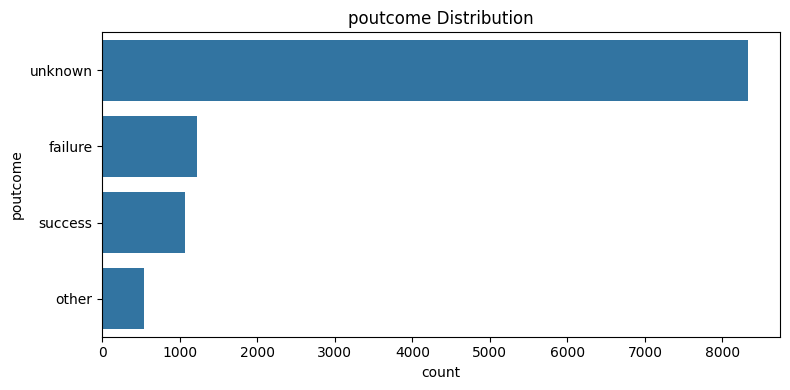

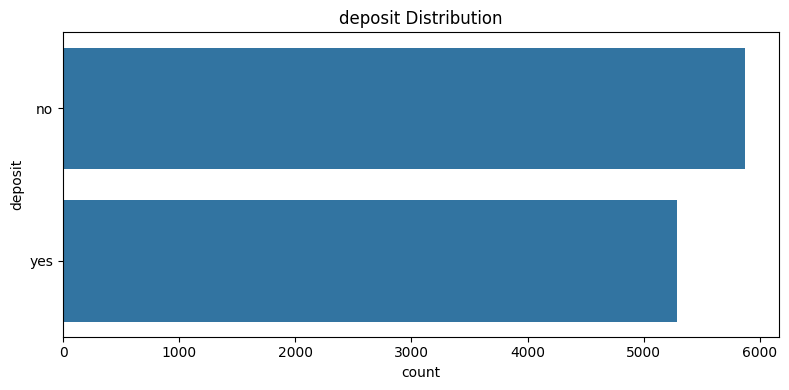

In [8]:
# Distribution of some important categorical variables
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=col, data=data, order=data[col].value_counts().index)
    plt.title(f'{col} Distribution')
    plt.tight_layout()
    plt.show()

## Numerical Distribution

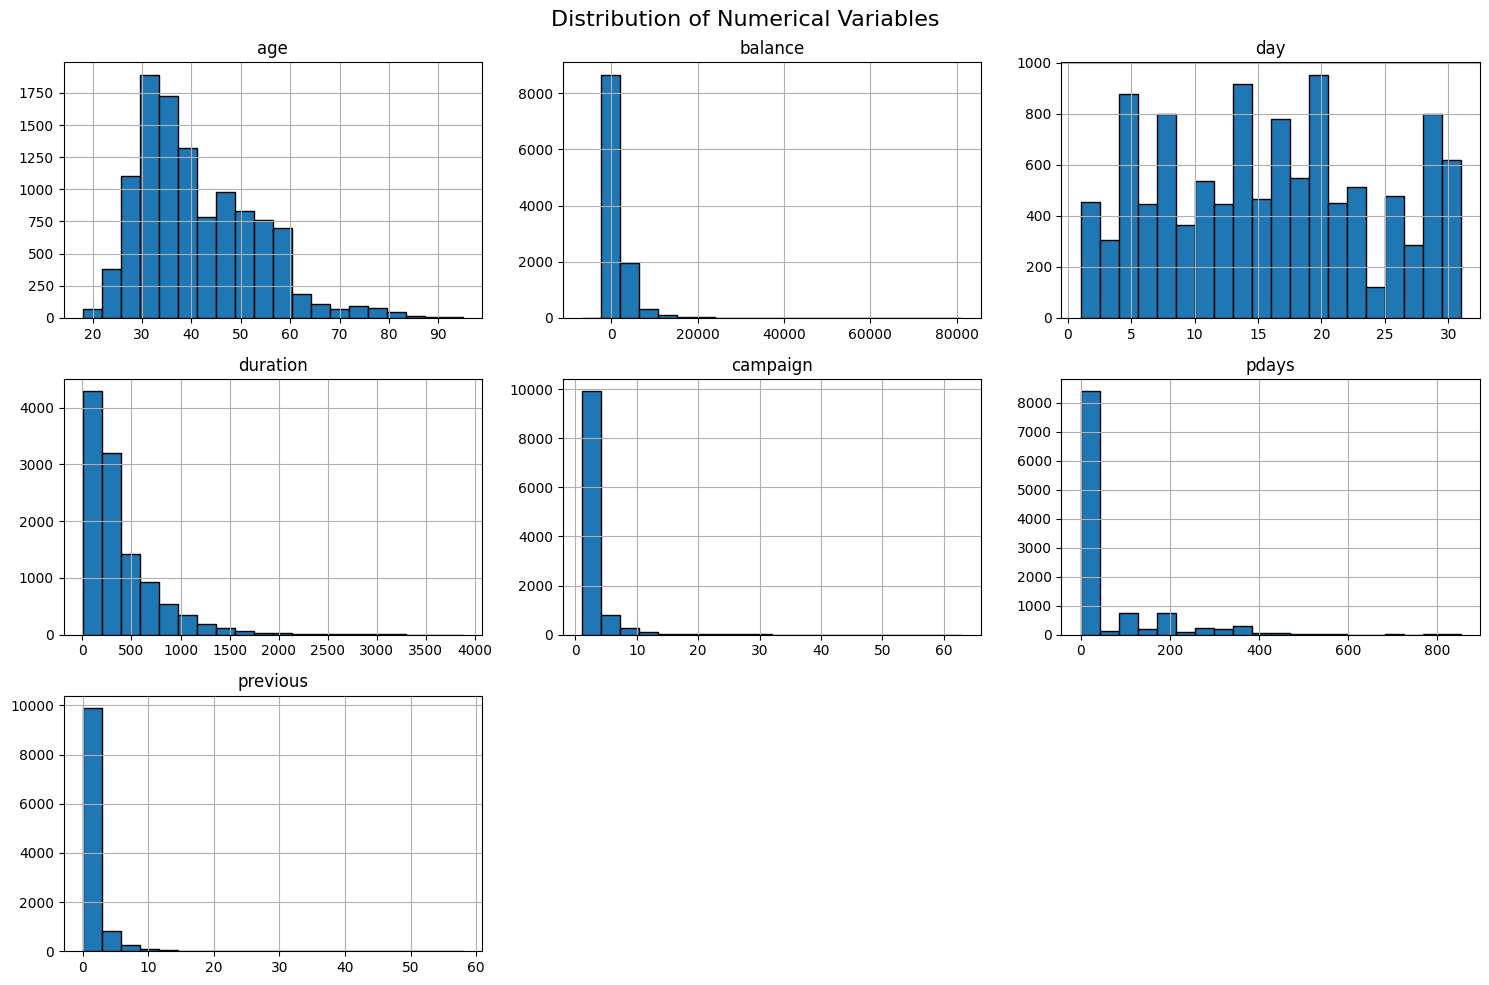

In [9]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Histogram for each numeric col
data[numeric_cols].hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle("Distribution of Numerical Variables", fontsize=16)
plt.tight_layout()
plt.show()


# Check for Outliers

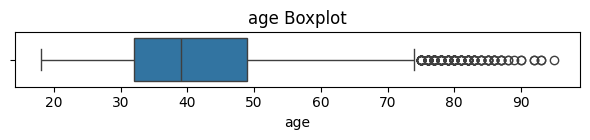

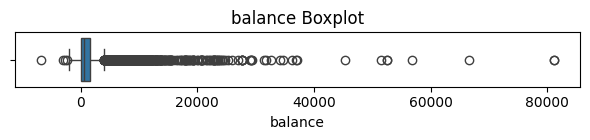

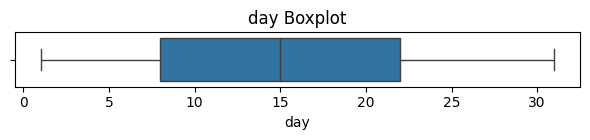

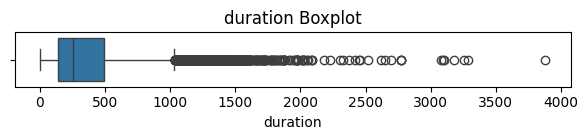

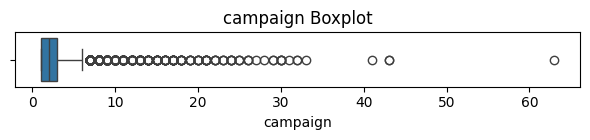

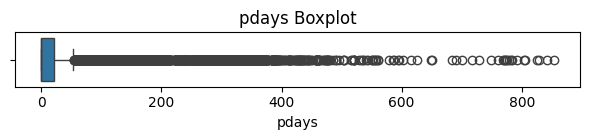

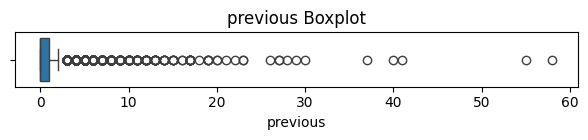

In [10]:
# Boxplot
for col in numeric_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(data[col], orient='h')
    plt.title(f"{col} Boxplot")
    plt.tight_layout()
    plt.show()

## Yes/No count in target variable

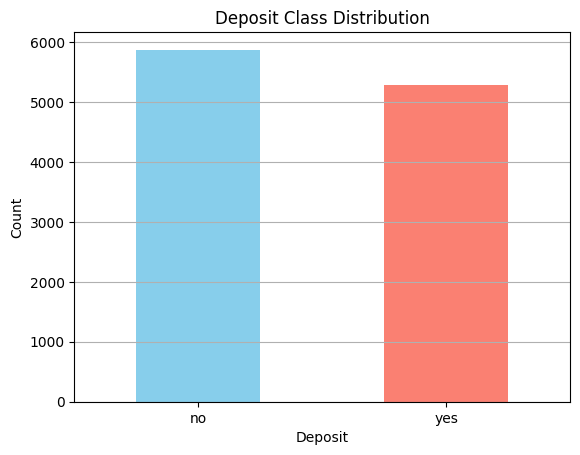

In [11]:
deposit_counts = data['deposit'].value_counts()

deposit_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Deposit Class Distribution')
plt.xlabel('Deposit')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

=> The dataset is therefore fairly balanced in it's target variable

## Correlation Heatmap

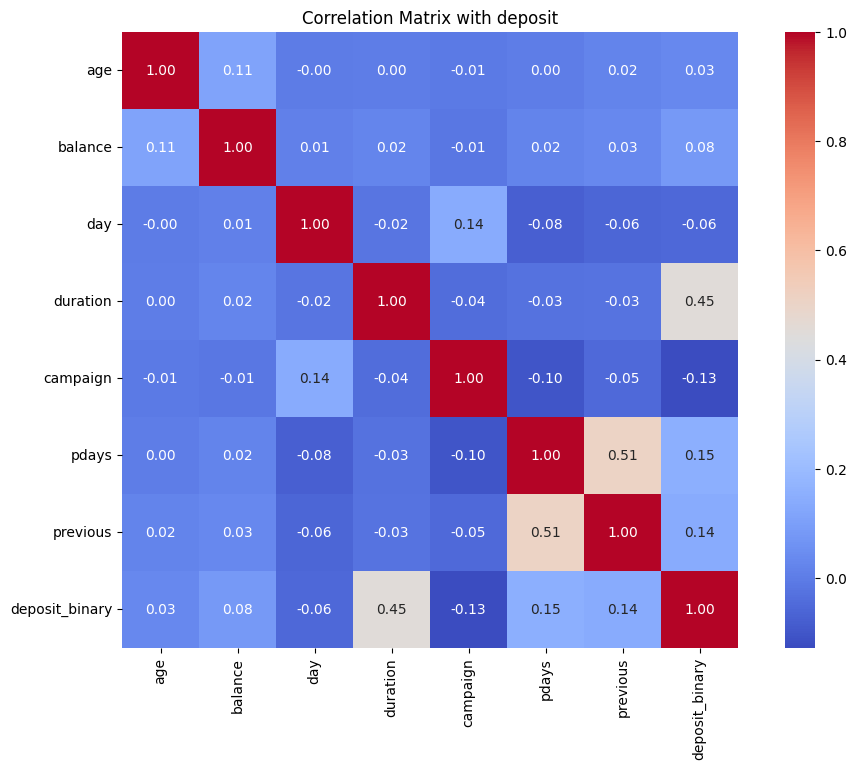

In [11]:
data['deposit_binary'] = data['deposit'].map({'yes': 1, 'no': 0})

numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
# numeric_cols.append('deposit_binary')

corr_matrix = data[numeric_cols].corr()


plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix with deposit')
plt.show()

## Crosstabs for Categorical Variables

In [13]:
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('deposit')  

for col in categorical_cols:
    print(f"\n Cross Tab for: {col}")
    display(pd.crosstab(data[col], data['deposit'], margins=True, normalize='index').round(2))


 Cross Tab for: job


deposit,no,yes
job,,
admin.,0.53,0.47
blue-collar,0.64,0.36
entrepreneur,0.62,0.38
housemaid,0.60,0.40
management,0.49,0.51
retired,0.34,0.66
self-employed,0.54,0.46
services,0.60,0.40
student,0.25,0.75



 Cross Tab for: marital


deposit,no,yes
marital,,
divorced,0.52,0.48
married,0.57,0.43
single,0.46,0.54
All,0.53,0.47



 Cross Tab for: education


deposit,no,yes
education,,
primary,0.61,0.39
secondary,0.55,0.45
tertiary,0.46,0.54
unknown,0.49,0.51
All,0.53,0.47



 Cross Tab for: default


deposit,no,yes
default,,
no,0.52,0.48
yes,0.69,0.31
All,0.53,0.47



 Cross Tab for: housing


deposit,no,yes
housing,,
no,0.43,0.57
yes,0.63,0.37
All,0.53,0.47



 Cross Tab for: loan


deposit,no,yes
loan,,
no,0.50,0.50
yes,0.67,0.33
All,0.53,0.47



 Cross Tab for: contact


deposit,no,yes
contact,,
cellular,0.46,0.54
telephone,0.50,0.50
unknown,0.77,0.23
All,0.53,0.47



 Cross Tab for: month


deposit,no,yes
month,,
apr,0.37,0.63
aug,0.55,0.45
dec,0.09,0.91
feb,0.43,0.57
jan,0.59,0.41
jul,0.59,0.41
jun,0.55,0.45
mar,0.10,0.90
may,0.67,0.33



 Cross Tab for: poutcome


deposit,no,yes
poutcome,,
failure,0.50,0.50
other,0.43,0.57
success,0.09,0.91
unknown,0.59,0.41
All,0.53,0.47


# Pre-processing for Next Stage

In [14]:
label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

X = data.drop('deposit', axis=1)
X = X.drop('deposit_binary', axis=1)

y = data['deposit']

X['deposit'] = y

In [15]:
X.to_csv('processed_bank_marketing.csv', index=False)